## Project 2: Sentiment Analysis on IMDB dataset
<hr>



1. Import all the dependencies

In [12]:
# Import libraries
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

import matplotlib.pyplot as plt

import keras

2. Defining Key Values:

In [13]:
# Defining key values 
num_words   = 5000   # number of words to consider as features
max_len     = 500    # maximum review length (in number of words)
batch_size  = 32     # batch size: Number of training examples utilized per iteration

3. Loading the data:

* ###### Using the API we download the preprocessed imdb dataset where reviews have been encoded as a sequence of word indexes (integers). Words are indexed by overall frequency in the dataset, which  allows us to quickly filter the most common words.

In [14]:
# Loading data
(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=num_words)
print(len(Xtrain), 'train sequences')
print(len(Xtest), 'test sequences')

25000 train sequences
25000 test sequences


4. Data preprocessing:

* ###### Using the API we download the preprocessed imdb dataset where reviews have been encoded as a sequence of word indexes (integers). Words are indexed by overall frequency in the dataset, which  allows us to quickly filter the most common words.

In [15]:
# Data preprocessing
Xtrain = sequence.pad_sequences(Xtrain, maxlen=max_len)
Xtest  = sequence.pad_sequences(Xtest, maxlen=max_len)
print('Input train shape:', Xtrain.shape)
print('Input test shape:', Xtest.shape)

Input train shape: (25000, 500)
Input test shape: (25000, 500)


In [16]:
# Decoding review

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in Xtrain[0] ))


<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

5. Building the model:

* ###### Using the API we download the preprocessed imdb dataset where reviews have been encoded as a sequence of word indexes (integers). Words are indexed by overall frequency in the dataset, which  allows us to quickly filter the most common words.

In [17]:
# Create model

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(num_words, embedding_vector_length, input_length=max_len))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


6. Compiling and fitting the model:

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(Xtrain, ytrain, 
                    batch_size=batch_size, 
                    epochs=12, 
                    validation_data=[Xtest, ytest], 
                    validation_split=0.2)

Epoch 1/12
625/625 [==============================] - 108s 170ms/step - loss: 0.5144 - accuracy: 0.7324 - val_loss: 0.3619 - val_accuracy: 0.8378
Epoch 2/12
625/625 [==============================] - 99s 159ms/step - loss: 0.2957 - accuracy: 0.8801 - val_loss: 0.3043 - val_accuracy: 0.8716
Epoch 3/12
625/625 [==============================] - 104s 166ms/step - loss: 0.2424 - accuracy: 0.9077 - val_loss: 0.3132 - val_accuracy: 0.8754
Epoch 4/12
625/625 [==============================] - 98s 157ms/step - loss: 0.2138 - accuracy: 0.9187 - val_loss: 0.3267 - val_accuracy: 0.8722
Epoch 5/12
625/625 [==============================] - 99s 158ms/step - loss: 0.1827 - accuracy: 0.9330 - val_loss: 0.3362 - val_accuracy: 0.8716
Epoch 6/12
625/625 [==============================] - 99s 159ms/step - loss: 0.1621 - accuracy: 0.9413 - val_loss: 0.3875 - val_accuracy: 0.8618
Epoch 7/12
625/625 [==============================] - 102s 163ms/step - loss: 0.1967 - accuracy: 0.9265 - val_loss: 0.3995 - val

7. Evaluating the model

In [19]:
# Evaluate the model
_, train_acc = model.evaluate(Xtrain, ytrain, verbose = 0)
_, test_acc = model.evaluate (Xtest, ytest, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_acc, test_acc))

Training Accuracy: 0.957, Testing Accuracy: 0.859


8. Plotting results

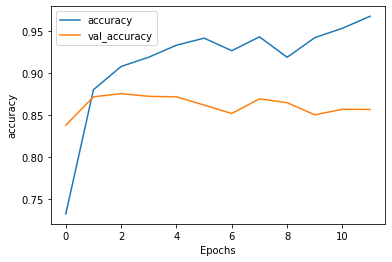

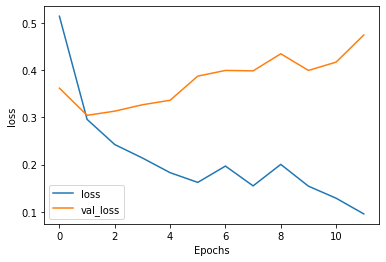

In [20]:
# Plotting results

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")